In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dixit = pd.read_csv('../../results/dixit.csv', index_col=0).assign(Dataset='Dixit').drop(['split'], axis=1)
adamson = pd.read_csv('../../results/adamson.csv', index_col=0).assign(Dataset='Adamson').drop(['split'], axis=1)
norman = pd.read_csv('../../results/norman.csv', index_col=0).assign(Dataset='Norman').drop(['split'], axis=1)
norman = norman[norman.subgroup=='single'].drop(['subgroup'], axis=1)
k562 = pd.read_csv('../../results/k562.csv', index_col=0).assign(Dataset='Replogle K562').drop(['split'], axis=1)
rpe1 = pd.read_csv('../../results/rpe1.csv', index_col=0).assign(Dataset='Replogle RPE1').drop(['split'], axis=1)

all_df = pd.concat([dixit, adamson, norman, k562, rpe1])
all_df = all_df.melt(id_vars=['Dataset', 'Method'], value_vars=['NormMSE', '1-PCC'], 
                                var_name='Metric', value_name='Value')
all_df['Method'] = pd.Categorical(all_df['Method'], categories=['Scouter', 'biolord', 'GEARS'], ordered=True)

# Define a custom color palette
custom_palette = {
    'Scouter': '#EFC000FF',
    'biolord': '#0073C2FF',
    'GEARS': '#CD534CFF'
}

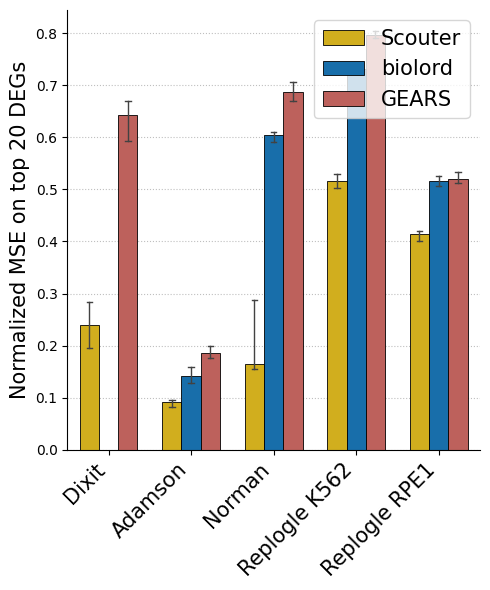

------------------------------------------------------
The percentage of improvment of Scouter over biolord:
Dataset
Adamson          0.344723
Dixit            0.988912
Norman           0.728650
Replogle K562    0.293816
Replogle RPE1    0.198383
dtype: float64
The average percentage of improvment of Scouter over biolord: 0.51
------------------------------------------------------
The percentage of improvment of Scouter over GEARS:
Dataset
Adamson          0.502568
Dixit            0.627632
Norman           0.761194
Replogle K562    0.352078
Replogle RPE1    0.204944
dtype: float64
The average percentage of improvment of Scouter over GEARS: 0.49


In [2]:
NMSE = all_df[all_df.Metric=='NormMSE']
NMSE_plot = NMSE[~((NMSE.Dataset == 'Dixit') & (NMSE.Method == 'biolord'))]
plt.figure(figsize=(5,6))
sns.barplot(data=NMSE_plot, x="Dataset", y="Value", hue="Method", width=0.7, 
            palette=custom_palette, estimator='median', errorbar=("ci", 50), 
            err_kws={'linewidth': 1}, capsize=0.2, edgecolor='black', linewidth=0.6)
legend = plt.legend(loc='upper right', fontsize=15)
legend.set_title('')
plt.xticks(rotation=45, fontsize=15, ha='right')
plt.xlabel('')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.grid(True, linestyle=':', color='gray', alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
plt.ylabel('Normalized MSE on top 20 DEGs', fontsize=15)
plt.tight_layout()
plt.savefig('/Users/Pancake/Desktop/scouterplots/NMSE_OneGene.png', dpi=300, bbox_inches='tight')
plt.show()

median_MSE = NMSE.groupby(['Dataset', 'Method'], observed=False)['Value'].median().reset_index()
pivot_MSE = median_MSE.pivot(index='Dataset', columns='Method', values='Value')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over biolord:')
pert_biolord = (pivot_MSE['biolord'] - pivot_MSE['Scouter'])/pivot_MSE['biolord']
print(pert_biolord)
print(f'The average percentage of improvment of Scouter over biolord: {pert_biolord.mean().round(2)}')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over GEARS:')
pert_gears = (pivot_MSE['GEARS'] - pivot_MSE['Scouter'])/pivot_MSE['GEARS']
print(pert_gears)
print(f'The average percentage of improvment of Scouter over GEARS: {pert_gears.mean().round(2)}')

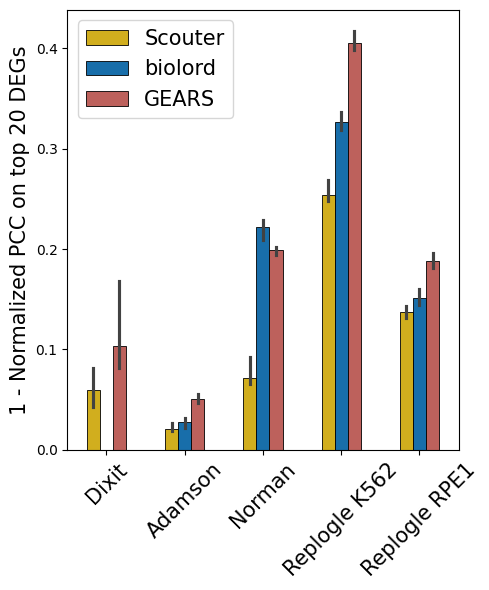

------------------------------------------------------
The percentage of improvment of Scouter over biolord:
Dataset
Adamson          0.268565
Dixit            0.936510
Norman           0.677585
Replogle K562    0.222950
Replogle RPE1    0.094071
dtype: float64
The average percentage of improvment of Scouter over biolord: 0.44
------------------------------------------------------
The percentage of improvment of Scouter over GEARS:
Dataset
Adamson          0.589019
Dixit            0.422665
Norman           0.639451
Replogle K562    0.372700
Replogle RPE1    0.269739
dtype: float64
The average percentage of improvment of Scouter over GEARS: 0.46


In [3]:
NPCC = all_df[all_df.Metric == '1-PCC'].copy()
NPCC_plot = NPCC[~((NPCC.Dataset == 'Dixit') & (NPCC.Method == 'biolord'))]
plt.figure(figsize=(5,6))
barplot = sns.barplot(data=NPCC_plot, x="Dataset", y="Value", hue="Method", width=0.5, 
                      palette=custom_palette, estimator='median', errorbar=("ci", 50))
for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.6)
legend = plt.legend(loc='upper left', fontsize=15)
legend.set_title('')
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('')
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4])
plt.ylabel('1 - Normalized PCC on top 20 DEGs', fontsize=15)
plt.tight_layout()
plt.show()

median_PCC = NPCC.groupby(['Dataset', 'Method'], observed=False)['Value'].median().reset_index()
pivot_PCC = median_PCC.pivot(index='Dataset', columns='Method', values='Value')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over biolord:')
pert_biolord = (pivot_PCC['biolord'] - pivot_PCC['Scouter'])/pivot_PCC['biolord']
print(pert_biolord)
print(f'The average percentage of improvment of Scouter over biolord: {pert_biolord.mean().round(2)}')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over GEARS:')
pert_gears = (pivot_PCC['GEARS'] - pivot_PCC['Scouter'])/pivot_PCC['GEARS']
print(pert_gears)
print(f'The average percentage of improvment of Scouter over GEARS: {pert_gears.mean().round(2)}')